# Import packages

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import datetime
from pandas.tseries.offsets import Day, MonthEnd
import seaborn as sns

# Import data set

In [2]:
os.chdir("C:\\Users\\Dell\\Desktop\\Iszwan\\MSc Data Science & Analytic\\STQD 6014 Data Science\\Python Script (ipynb) - Exercise")

In [3]:
road = pd.read_excel("Road Accident Data.xlsx")

In [4]:
road.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [5]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int64         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 11  Carriageway_Hazards         5424 non-nu

# Trend for number of casualties

In [6]:
#1. Choose relevant columns
n_cas = road[["Accident Date", "Number_of_Casualties"]]

In [7]:
#2. Set Index
n_cas.set_index("Accident Date", inplace=True)

n_cas

,Number_of_Casualties
Accident Date,
2021-01-01,1
2021-01-05,11
2021-01-04,1
2021-01-05,1
2021-01-06,1
...,...
2022-02-18,2
2022-02-21,1
2022-02-23,1


In [8]:
n_cas.tail()

,Number_of_Casualties
Accident Date,
2022-02-18,2
2022-02-21,1
2022-02-23,1
2022-02-23,1
2022-02-28,1


In [9]:
#3. Find total casualties by month

n_cas_month = n_cas.groupby(MonthEnd().rollforward).sum()

n_cas_month

,Number_of_Casualties
Accident Date,
2021-01-31,18173
2021-02-28,14648
2021-03-31,17815
2021-04-30,17335
2021-05-31,18852
2021-06-30,18728
2021-07-31,19682
2021-08-31,18797
2021-09-30,18456


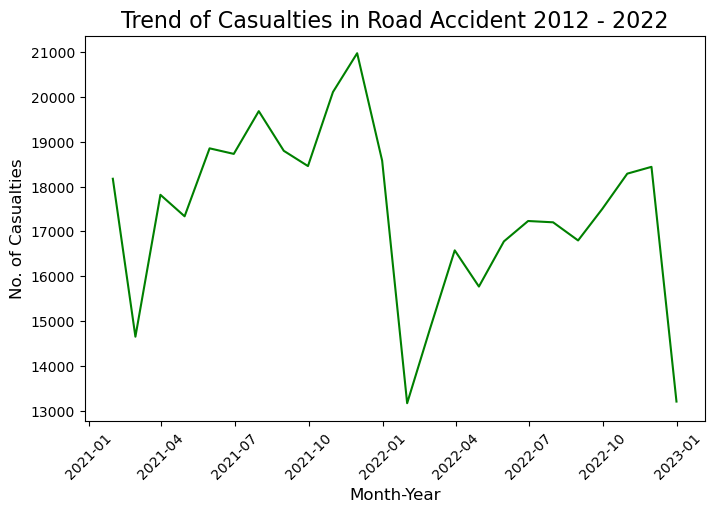

In [10]:
#4. Plot trend

plt.figure(figsize=(8, 5))
plt.plot(n_cas_month, color = "green")
plt.title('Trend of Casualties in Road Accident 2012 - 2022', fontsize=16)
plt.ylabel('No. of Casualties', fontsize=12)
plt.xlabel('Month-Year', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

# Comparing trend Year-of-Year (YOY) for casualties (Method 2)

In [11]:
#1. Slicing data

n_cas_2021 = n_cas_month['2021-01-31':'2021-12-31']
n_cas_2022 = n_cas_month['2022-01-31':'2022-12-31']

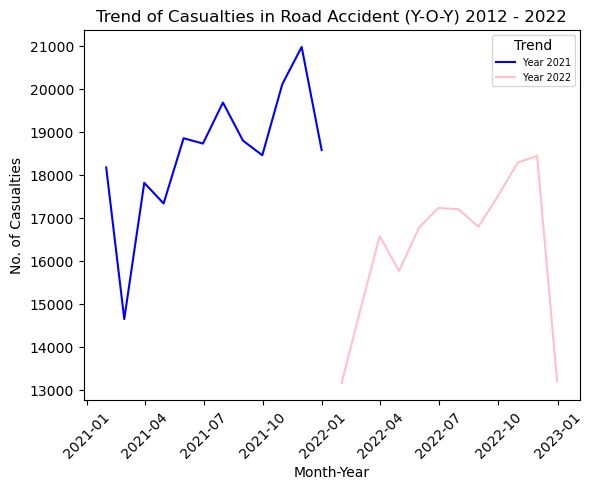

In [12]:
#2. Plot trend

fig, ax = plt.subplots()

ax.plot(n_cas_2021, color='blue', label='Year 2021')
ax.plot(n_cas_2022, color='pink', label='Year 2022')
ax.set_title("Trend of Casualties in Road Accident (Y-O-Y) 2012 - 2022")
ax.set_xlabel("Month-Year")
ax.set_ylabel("No. of Casualties")
ax.legend(title='Trend', loc = "best", fontsize="x-small")
plt.xticks(rotation = 45)
plt.show()

# Comparing trend Year-of-Year (YOY) for casualties (Method 2)

In [13]:
#1. Choose relevant columns
n_cas_1 = road[["Month", "Year", "Number_of_Casualties"]]

In [14]:
#2. Replace month to no.

month = {'Jan' : 1,
         'Feb' : 2,
         'Mar' : 3,
         'Apr' : 4,
         'May' : 5,
         'Jun' : 6,
         'Jul' : 7,
         'Aug' : 8,
         'Sep' : 9,
         'Oct' : 10,
         'Nov' : 11,
         'Dec' : 12}

n_cas_1["Months"] = n_cas_1["Month"].map(month)

C:\Users\Dell\AppData\Local\Temp\ipykernel_27864\3223898349.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_cas_1["Months"] = n_cas_1["Month"].map(month)


In [15]:
n_cas_1

,Month,Year,Number_of_Casualties,Months
0,Jan,2021,1,1
1,Jan,2021,11,1
2,Jan,2021,1,1
3,Jan,2021,1,1
4,Jan,2021,1,1
...,...,...,...,...
307968,Feb,2022,2,2
307969,Feb,2022,1,2
307970,Feb,2022,1,2
307971,Feb,2022,1,2


In [16]:
#2.  Maintain relevant columns

n_cas_1 = n_cas_1[["Months", "Year", "Number_of_Casualties"]]

In [17]:
#3. Rename column

n_cas_1 = n_cas_1.rename(columns={"Months": "Month"})

In [18]:
#4. Find total casualties by month

n_cas_1_month = n_cas_1.groupby(['Month', 'Year']).sum()

n_cas_1_month 

Number_of_Casualties
Month Year                      
1     2021                 18173
      2022                 13163
2     2021                 14648
      2022                 14804
3     2021                 17815
      2022                 16575
4     2021                 17335
      2022                 15767
5     2021                 18852
      2022                 16775
6     2021                 18728
      2022                 17230
7     2021                 19682
      2022                 17201
8     2021                 18797
      2022                 16796
9     2021                 18456
      2022                 17500
10    2021                 20109
      2022                 18287
11    2021                 20975
      2022                 18439
12    2021                 18576
      2022                 13200

In [19]:
#5. Reset index

n_cas_1_month.reset_index()

,Month,Year,Number_of_Casualties
0,1,2021,18173
1,1,2022,13163
2,2,2021,14648
3,2,2022,14804
4,3,2021,17815
5,3,2022,16575
6,4,2021,17335
7,4,2022,15767
8,5,2021,18852
9,5,2022,16775


In [20]:
#6. Convert from long to wide format

n_cas_1w = n_cas_1_month.pivot_table('Number_of_Casualties', index = 'Month',
                               columns = "Year")
n_cas_1w

Year,2021,2022
Month,,
1,18173.0,13163.0
2,14648.0,14804.0
3,17815.0,16575.0
4,17335.0,15767.0
5,18852.0,16775.0
6,18728.0,17230.0
7,19682.0,17201.0
8,18797.0,16796.0
9,18456.0,17500.0


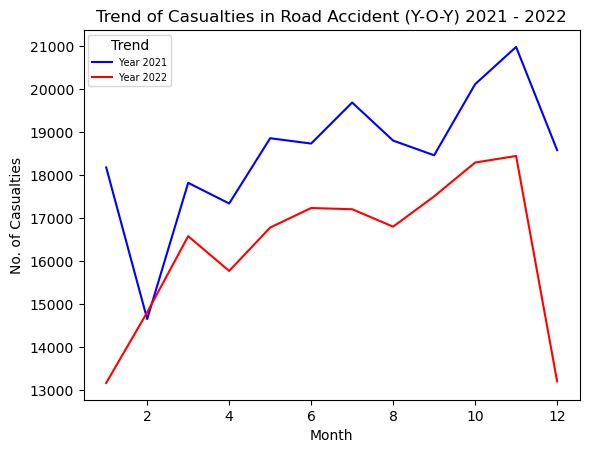

In [21]:
#7. Plot trend

fig, ax = plt.subplots()

ax.plot(n_cas_1w[[2021]], color='blue', label='Year 2021')
ax.plot(n_cas_1w[[2022]], color='red', label='Year 2022')
ax.set_title("Trend of Casualties in Road Accident (Y-O-Y) 2021 - 2022")
ax.set_xlabel("Month")
ax.set_ylabel("No. of Casualties")
ax.legend(title='Trend', loc = "best", fontsize="x-small")
plt.show()

# Comparing on casualties through BOXPLOT

In [22]:
#1. Get descriptive statistics

n_cas_1w.describe()

Year,2021,2022
count,12.000000,12.000000
mean,18512.166667,16311.416667
std,1571.130041,1762.198186
min,14648.000000,13163.000000
25%,18083.500000,15526.250000
50%,18652.000000,16785.500000
75%,19059.500000,17297.500000
max,20975.000000,18439.000000


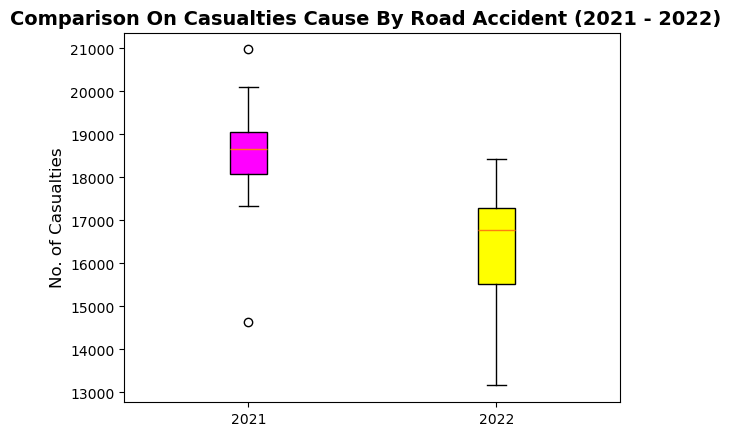

In [23]:
#2. Plot boxplot

bplot = plt.boxplot(n_cas_1w, tick_labels = ["2021", "2022"], patch_artist=True)

# Set colors for the boxes
colors = ["magenta", "yellow"]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
# Add title and labels
plt.title("Comparison On Casualties Cause By Road Accident (2021 - 2022)  ", fontsize=14, fontweight='bold')
plt.ylabel("No. of Casualties", fontsize=12)
plt.xticks
plt.show()

# Comparing on casualties through HISTOGRAM

In [59]:
#1. Select relevant columns

data_hist = n_cas_1_month.reset_index()

data_hist

,Month,Year,Number_of_Casualties
0,1,2021,18173
1,1,2022,13163
2,2,2021,14648
3,2,2022,14804
4,3,2021,17815
5,3,2022,16575
6,4,2021,17335
7,4,2022,15767
8,5,2021,18852
9,5,2022,16775


In [60]:
#2. Re-arrange column

data_hist = data_hist[["Year", "Month", "Number_of_Casualties"]]

In [68]:
#3. Filter data into 2021 & 2022

hist2021 = data_hist[data_hist['Year'] == 2021]["Number_of_Casualties"]
hist2022 = data_hist[data_hist['Year'] == 2022]["Number_of_Casualties"]

In [69]:
hist2021

0     18173
2     14648
4     17815
6     17335
8     18852
10    18728
12    19682
14    18797
16    18456
18    20109
20    20975
22    18576
Name: Number_of_Casualties, dtype: int64

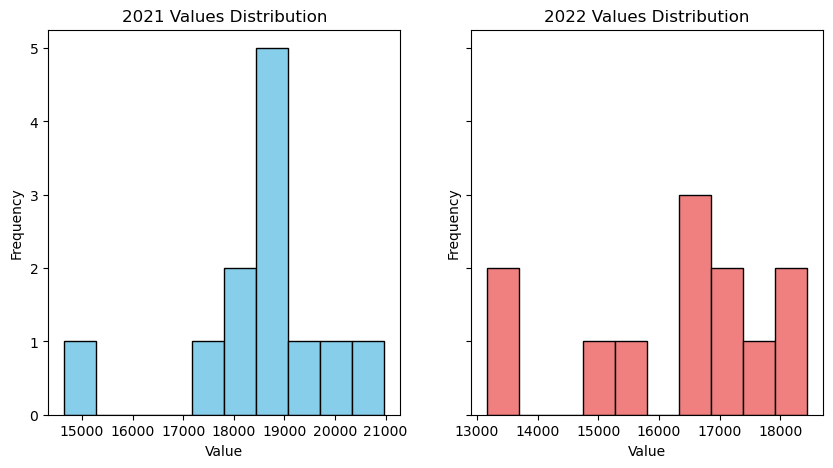

In [72]:
#4. Plotting two histogram in one parameter
# 2 x 1; 2 plots in total

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey = True)  # 1 row, 2 columns

# Plot histograms
axes[0].hist(hist2021, bins=10, color='skyblue', edgecolor='black')  # Adjust bins as needed
axes[0].set_title('2021 Values Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(hist2022, bins=10, color='lightcoral', edgecolor='black')  # Adjust bins as needed
axes[1].set_title('2022 Values Distribution')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
plt.show()

# Comparing on casualties through BARPLOT (For Normalized, Data must be in Long Format)

In [73]:
#1. Select relevant columns

data_bplot = n_cas_1_month.reset_index()

data_bplot

,Month,Year,Number_of_Casualties
0,1,2021,18173
1,1,2022,13163
2,2,2021,14648
3,2,2022,14804
4,3,2021,17815
5,3,2022,16575
6,4,2021,17335
7,4,2022,15767
8,5,2021,18852
9,5,2022,16775


In [76]:
#2. Calculate percentage of casualties

#2i. Create formula
def norm_total(group):
    group["Cas_Percent"] = group["Number_of_Casualties"] / group["Number_of_Casualties"].sum()
    return group

#2ii. Normalize the group percentages to sum = 1
data_bplot1 = data_bplot.groupby('Year', group_keys=False).apply(norm_total)
data_bplot1.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_27864\949325956.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_bplot1 = data_bplot.groupby('Year', group_keys=False).apply(norm_total)


,Month,Year,Number_of_Casualties,Cas_Percent
0,1,2021,18173,0.081807
1,1,2022,13163,0.067248
2,2,2021,14648,0.065939
3,2,2022,14804,0.075632
4,3,2021,17815,0.080195


In [77]:
#3. Reset index to prepare data for visualization
data_bplot1 = data_bplot1.reset_index()

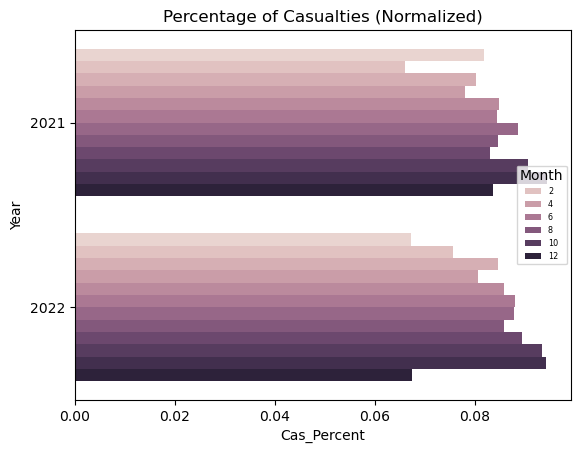

In [86]:
#4. Ploting Barplot

bp_ax = sns.barplot(x = 'Cas_Percent', y = 'Year', data=data_bplot1, orient='h', hue='Month')
bp_ax.set_title('Percentage of Casualties (Normalized)')
bp_ax.legend(title='Month', loc = "center right", fontsize="xx-small")
plt.show()


# Visualizing casualties through HEATMAP (Data must be in wide format)

In [88]:
#1. Choose data (Wide Format)

data_hm = n_cas_1w

data_hm

Year,2021,2022
Month,,
1,18173.0,13163.0
2,14648.0,14804.0
3,17815.0,16575.0
4,17335.0,15767.0
5,18852.0,16775.0
6,18728.0,17230.0
7,19682.0,17201.0
8,18797.0,16796.0
9,18456.0,17500.0


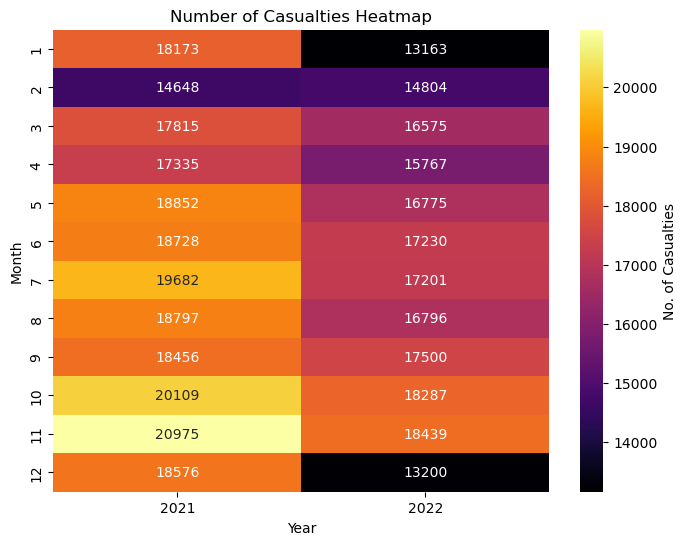

In [93]:
# 2. Create the heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(data_hm, annot=True, cmap= "inferno", fmt=".0f",
           cbar_kws = {"label": "No. of Casualties"})  # fmt removes decimal places, cmap for color
plt.title('Number of Casualties Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# cmap options: "viridis", "plasma", "magma", "inferno", "cividis", "Blues", "Reds", "YlGnBu" 

# Customize the annotation format (e.g., add commas for thousands separators)
# sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=",.0f")

# Center the colorbar at zero (useful for diverging data)
# from matplotlib.colors import TwoSlopeNorm
# norm = TwoSlopeNorm(vmin=heatmap_data.min().min(), vcenter=0, vmax=heatmap_data.max().max())
# sns.heatmap(heatmap_data, annot=True, cmap="RdBu_r", norm=norm)

# Visualizing casualties through SCATTERPLOT (Data must be in long format)

In [94]:
#1. Select relevant columns

data_scatplot = n_cas_1_month.reset_index()

data_scatplot

,Month,Year,Number_of_Casualties
0,1,2021,18173
1,1,2022,13163
2,2,2021,14648
3,2,2022,14804
4,3,2021,17815
5,3,2022,16575
6,4,2021,17335
7,4,2022,15767
8,5,2021,18852
9,5,2022,16775


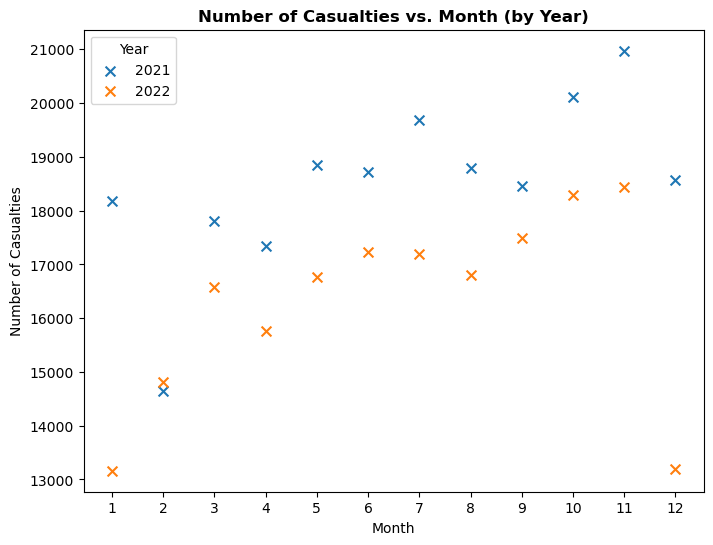

In [97]:
# Create the scatter plot (2 data)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for year in data_scatplot['Year'].unique():  # Loop through each unique year
    year_data = data_scatplot[data_scatplot['Year'] == year]
    plt.scatter(year_data['Month'], year_data['Number_of_Casualties'], label=year, marker='x', s=50) 
    # Customize marker and size

plt.title('Number of Casualties vs. Month (by Year)', fontweight="bold")
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.xticks(range(1, 13))  # Set x-axis ticks for months (1 to 12)
plt.legend(title='Year')  # Show the legend with a title
plt.show()

# Visualizing casualties through PAIRPLOT

In [99]:
# 1. Choose relevant columns

pp_data = road[["Month", "Year", "Number_of_Casualties", "Number_of_Vehicles", "Speed_limit"]]

pp_data

,Month,Year,Number_of_Casualties,Number_of_Vehicles,Speed_limit
0,Jan,2021,1,2,30
1,Jan,2021,11,2,30
2,Jan,2021,1,2,30
3,Jan,2021,1,2,30
4,Jan,2021,1,2,30
...,...,...,...,...,...
307968,Feb,2022,2,1,60
307969,Feb,2022,1,1,60
307970,Feb,2022,1,3,30
307971,Feb,2022,1,2,60


In [100]:
#2. Replace month to no.

month = {'Jan' : 1,
         'Feb' : 2,
         'Mar' : 3,
         'Apr' : 4,
         'May' : 5,
         'Jun' : 6,
         'Jul' : 7,
         'Aug' : 8,
         'Sep' : 9,
         'Oct' : 10,
         'Nov' : 11,
         'Dec' : 12}

pp_data["Month#"] = pp_data["Month"].map(month)

C:\Users\Dell\AppData\Local\Temp\ipykernel_27864\4182124996.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_data["Month#"] = pp_data["Month"].map(month)


In [102]:
#3. Arrange columns

pp_data = pp_data[["Month#", "Year", "Number_of_Casualties", "Number_of_Vehicles", "Speed_limit"]]

In [104]:
#4. Find total casualties, vehicles by month

pp_data1 = pp_data.groupby(['Month#', 'Year']).agg({'Number_of_Casualties': 'sum',
                                                    'Number_of_Vehicles': 'sum',
                                                    'Speed_limit': 'mean'})
pp_data1

Number_of_Casualties  Number_of_Vehicles  Speed_limit
Month# Year                                                       
1      2021                 18173               24098    39.523739
       2022                 13163               17762    39.258553
2      2021                 14648               19440    39.473973
       2022                 14804               19777    39.179698
3      2021                 17815               23949    38.207847
       2022                 16575               22568    38.135483
4      2021                 17335               23364    38.759733
       2022                 15767               21340    38.616855
5      2021                 18852               25268    38.526537
       2022                 16775               22623    38.416586
6      2021                 18728               25715    38.754305
       2022                 17230               23680    38.033094
7      2021                 19682               26263    39.329371
       2022                 17201               23318    38.631155
8      2021                 18797               24788    39.627283
       2022                 16796               22418    39.248015
9      2021                 18456               25475    38.591937
       2022                 17500               23975    38.316358
10     2021                 20109               27057    38.781853
       2022                 18287               24867    38.356731
11     2021                 20975               28491    39.135914
       2022                 18439               25019    38.743210
12     2021                 18576               24779    39.708221
       2022                 13200               17268    39.707013

In [110]:
#5. Reset Index

pp_data1 = pp_data1.reset_index()


In [112]:
#6. Choose data to transform

pp_data2021 = pp_data1[pp_data1['Year'] == 2021][["Number_of_Casualties", "Number_of_Vehicles", "Speed_limit"]]
pp_data2022 = pp_data1[pp_data1['Year'] == 2022][["Number_of_Casualties", "Number_of_Vehicles", "Speed_limit"]]

In [113]:
#7. Transform dataset
trans_data2021 = np.log(pp_data2021).diff().dropna() # .diff() is to find the difference of two values
trans_data2022 = np.log(pp_data2022).diff().dropna() # .diff() is to find the difference of two values

# Display content
trans_data2021.head()
trans_data2022.head()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit
3,0.117488,0.107458,-0.002011
5,0.112998,0.132013,-0.027014
7,-0.049976,-0.055950,0.012544
9,0.061971,0.058384,-0.005200
11,0.026762,0.045664,-0.010033


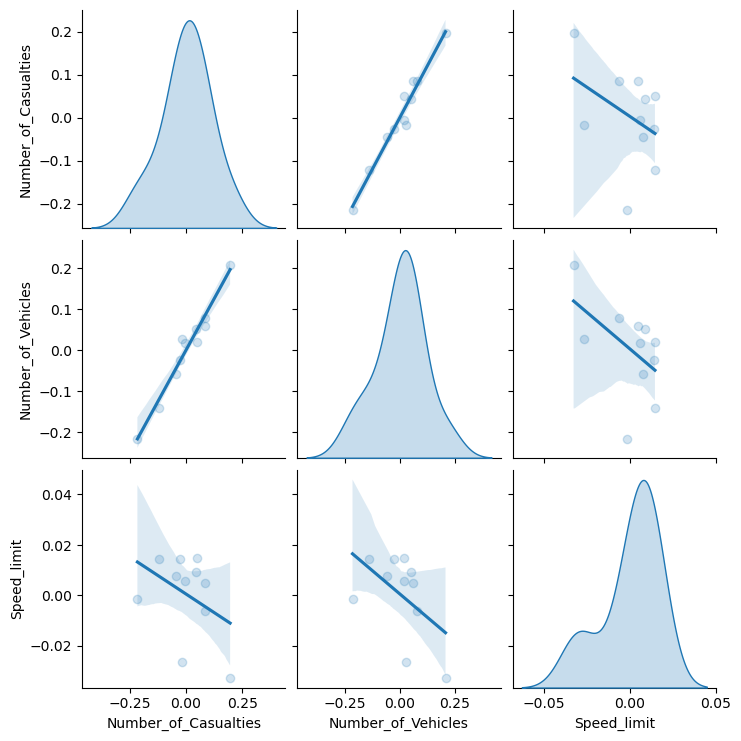

In [114]:
# Pairplot 2021
sns.pairplot(trans_data2021, diag_kind= 'kde', kind ='reg', plot_kws = {'scatter_kws':{'alpha':0.2}})
plt.show()

#Key Observations and Insights

# Positive Correlation: The most noticeable relationship is the positive correlation between 
# Number_of_Casualties and Number_of_Vehicles. This suggests that areas or time periods with higher traffic volume tend to have more casualties.

# Weak Negative Correlation: The negative correlation between Speed_limit and Number_of_Casualties is weaker.
# It might indicate that higher speed limits are associated with slightly fewer casualties, but other factors are likely at play.

# Distributions: Both Number_of_Casualties and Number_of_Vehicles appear to be roughly normally distributed,
# which is important to know if you plan to use statistical methods that assume normality.

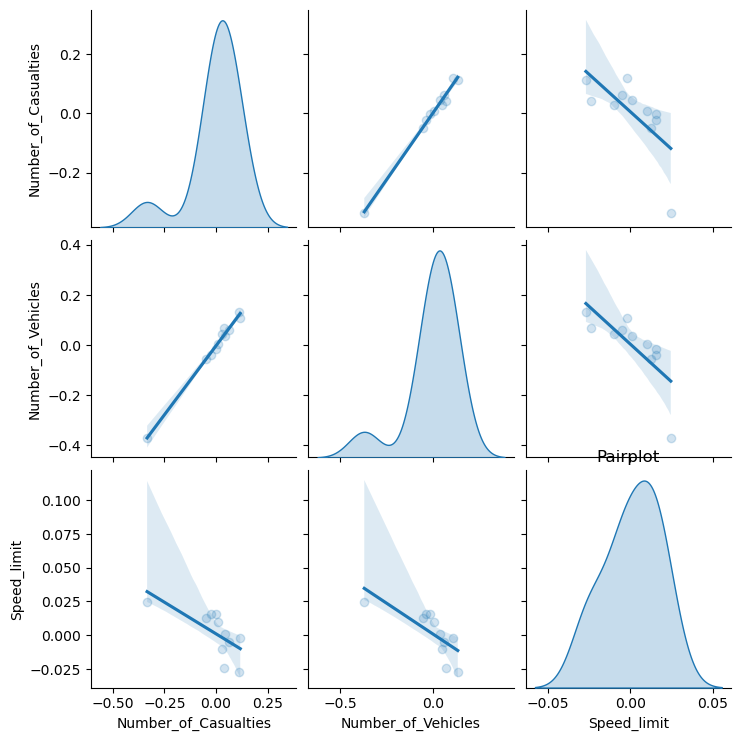

In [117]:
# Pairplot 2022
sns.pairplot(trans_data2022, diag_kind= 'kde', kind ='reg', plot_kws = {'scatter_kws':{'alpha':0.2}})
plt.show()

# Visualisation for No. of Casualties vs Number of Vehicles through REGPLOT
## Data must be transform just like we did for PAIRPLOT

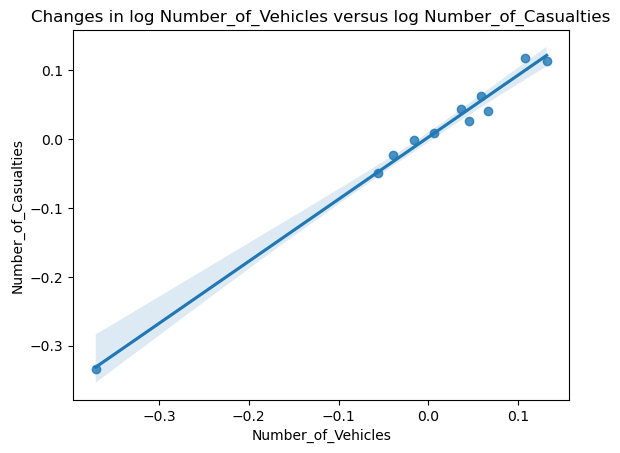

In [116]:
sns.regplot( x = 'Number_of_Vehicles', y = 'Number_of_Casualties', data= trans_data2022)
plt.title('Changes in log %s versus log %s' % ('Number_of_Vehicles', 'Number_of_Casualties'))
plt.show()

# Other reference

In [ ]:
# Find total casualties by month
# this will work if there is multi-index

# n_cas_1_month = n_cas_1.groupby(level=['Months', 'Year']).sum()

# n_cas_1_month 

In [ ]:
# Sort the MultiIndex (important for slicing to work reliably)
# n_cas_1_month = n_cas_1_month.sort_index(level=['Month', 'Year'])

In [47]:
# Convert Wide Format to Long Format
# n_cas_1l = n_cas_1w.stack().reset_index()
# n_cas_1l